In [1]:
from module import dqn

import random

import gym
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
env = gym.make('CartPole-v1', render_mode='human')
# get size of state and action from environment
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

print("State size = ", state_size, "; action size = ", action_size)

State size =  4 ; action size =  2


TRAINING

In [3]:
env = gym.make('CartPole-v1')
# create an agent
agent = dqn.DQNAgent(state_size, action_size)
# to store the scores and episodes
num_episodes = 10000
scores, avg_scores = [], []
# start training
for e in range(num_episodes):
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state[0], [1, state_size])

    while not done:
        # get action for the current state and go one step in environment
        action = agent.act(state)
        next_state, reward, done, _, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        # if an action makes the episode end, gives penalty of -100
        if done:
            reward = -100
        # store the data
        agent.store_data(state=state, action=action, reward=reward, next_state=next_state, done=done)
        # train every time step
        agent.learn()
        score += reward
        state = next_state

        if done:
            # score needs to be added by 100 because we punished the last action if done
            score += 100
            scores.append(score)
            avg_scores.append(np.mean(scores[-100:]))
            if e % 20 == 0:
                print("Episode:", e, " -- Score:", score, " -- Avg score:", round(avg_scores[-1], 2))
    
    # stop training if the avg score is above 1000
    if avg_scores[-1] >= 1000:
        print('Training is done ! The average score is above 1000.')
        break
    

Episode: 0  -- Score: 27.0  -- Avg score: 27.0
Episode: 20  -- Score: 49.0  -- Avg score: 17.1
Episode: 40  -- Score: 12.0  -- Avg score: 15.44


/Users/sondinhvan/miniconda3/envs/rl_env/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 60  -- Score: 8.0  -- Avg score: 13.97
Collect enough samples. Start training.
Episode: 80  -- Score: 8.0  -- Avg score: 13.32
Episode: 100  -- Score: 12.0  -- Avg score: 18.4
Episode: 120  -- Score: 9.0  -- Avg score: 17.14
Episode: 140  -- Score: 28.0  -- Avg score: 17.76
Episode: 160  -- Score: 34.0  -- Avg score: 25.57
Episode: 180  -- Score: 124.0  -- Avg score: 50.95
Episode: 200  -- Score: 145.0  -- Avg score: 70.72
Episode: 220  -- Score: 391.0  -- Avg score: 126.44
Episode: 240  -- Score: 349.0  -- Avg score: 198.09
Episode: 260  -- Score: 349.0  -- Avg score: 253.93
Episode: 280  -- Score: 284.0  -- Avg score: 288.95
Episode: 300  -- Score: 276.0  -- Avg score: 318.27
Episode: 320  -- Score: 285.0  -- Avg score: 315.52
Episode: 340  -- Score: 288.0  -- Avg score: 299.9
Episode: 360  -- Score: 279.0  -- Avg score: 292.85
Episode: 380  -- Score: 302.0  -- Avg score: 293.06
Episode: 400  -- Score: 271.0  -- Avg score: 290.3
Episode: 420  -- Score: 248.0  -- Avg score: 2

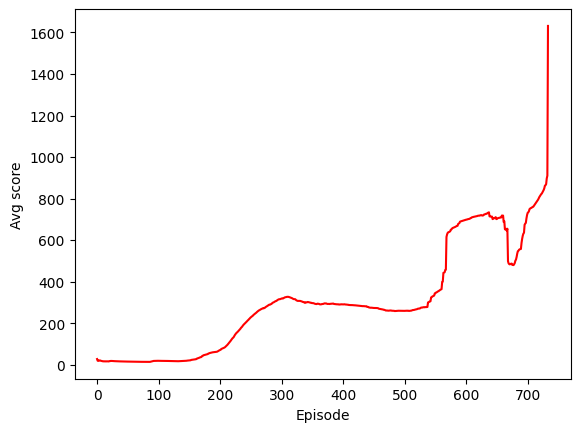

In [6]:
plt.plot(avg_scores, color='red')
plt.xlabel('Episode')
plt.ylabel('Avg score')
plt.savefig('dqn_cartpole_loss_over_episodes')

TESTING

In [8]:
env = gym.make('CartPole-v1', render_mode='human')
# start testing
done = False
score = 0
state = env.reset()
state = np.reshape(state[0], [1, state_size])

while not done:
    # get action for the current state and go one step in environment
    action = agent.act(state, evaluate=True)
    next_state, reward, done, _, info = env.step(action)
    next_state = np.reshape(next_state, [1, state_size])
    score += reward
    state = next_state

print(score)

1285.0


In [ ]:
score